In [6]:
import pandas as pd
import numpy as np
import requests
import nltk
import json
import random
from nltk import word_tokenize,sent_tokenize
import nltk
from nltk.corpus import state_union 
from nltk.collocations import *
import urllib.request
import pickle
from nltk.corpus import stopwords
from string import punctuation
from sklearn.feature_extraction.text import CountVectorizer
from time import sleep
import pickle
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
# Remove punctuation
import preprocessor as p
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import botometer

filename="suspended_account_index_list_for_sample"
infile = open(filename,'rb')
suspended_account_index_list = pickle.load(infile)
infile.close()
#print(tweeting_df)

suspended_account_index_list_sample=suspended_account_index_list[:8]
print(suspended_account_index_list_sample)

[0, 2, 3, 11, 15, 17, 20, 28]


In [8]:
#get the 

def read_and_process(file_name,user):
    full_text=[]
    with open(file_name) as f:
        for line in f:
            if json.loads(line)['lang']=='en' and json.loads(line)['user']['screen_name']==user:
                text=json.loads(line)['full_text']
                if (text.startswith("RT") and ('retweeted_status' in json.loads(line))):
                    full_text.append(json.loads(line)['retweeted_status']['full_text'])
                else:
                    full_text.append(json.loads(line)['full_text'])
            #data.append(json.loads(line))
    
    return full_text

#ex_df=read_and_process("ae832c68a41b48b890a426e159076a9b_005.json")
#print(ex_df)
full_text_list_for_suspended_account_sample=[]
for index in suspended_account_index_list_sample:
    user=tweeter_sample_by_num_of_status[index]
    full_text_1=read_and_process("ae832c68a41b48b890a426e159076a9b_001.json",user)
    full_text_2=read_and_process("ae832c68a41b48b890a426e159076a9b_002.json",user)
    full_text_3=read_and_process("ae832c68a41b48b890a426e159076a9b_003.json",user)
    full_text_4=read_and_process("ae832c68a41b48b890a426e159076a9b_004.json",user)
    full_text_list_for_suspended_account_sample.append(full_text_1+full_text_2+full_text_3+full_text_4)
    
print(full_text_list_for_suspended_account_sample)

[['RT: @rt_com :Chemtrails, contrails or just aliens? UFO stuns onlookers across China, Inner Mongolia (VIDEOS)… https://t.co/kdKqa9p70T'], ['#VT #NEWS #NEWSPOST Altitudes and method of SRM Chemtrails Lift, the artificial Pinatubo-Effect. Recalling memory and truth by historic\xa0pictures. https://t.co/dFJIEnmvL6', '#VT #NEWS #NEWSPOST A Sleepwalking Society Breathes ChemTrail Toxins In Plain Sight (Updated) https://t.co/SCsy3ZaJ79'], ['I am so glad Flat Earthers and Chemtrail Theorists finally have a representative in Congress https://t.co/5pkCevvnDM'], ["'Chemtrail' conspiracy theorists: The people who think governments control the weather https://t.co/nP6p8zyJt2 via @BBCWorld https://t.co/eP6rQa3VLx", "'Chemtrail' conspiracy theorists: The people who think governments control the weather https://t.co/nP6p8zyJt2 via @BBCWorld https://t.co/eP6rQa3VLx"], ["#Science - Amazon's Alexa says chemtrails are a government conspiracy theory, If you ask... https://t.co/jc1J5iuEqM https://t.co/0r

In [9]:
filename = 'full_text_list_for_suspended_accounts'
outfile = open(filename,'wb')
pickle.dump(full_text_list_for_suspended_account_sample,outfile)
outfile.close()

flat_list = [item for sublist in full_text_list_for_suspended_account_sample for item in sublist]
print(flat_list)

['RT: @rt_com :Chemtrails, contrails or just aliens? UFO stuns onlookers across China, Inner Mongolia (VIDEOS)… https://t.co/kdKqa9p70T', '#VT #NEWS #NEWSPOST Altitudes and method of SRM Chemtrails Lift, the artificial Pinatubo-Effect. Recalling memory and truth by historic\xa0pictures. https://t.co/dFJIEnmvL6', '#VT #NEWS #NEWSPOST A Sleepwalking Society Breathes ChemTrail Toxins In Plain Sight (Updated) https://t.co/SCsy3ZaJ79', 'I am so glad Flat Earthers and Chemtrail Theorists finally have a representative in Congress https://t.co/5pkCevvnDM', "'Chemtrail' conspiracy theorists: The people who think governments control the weather https://t.co/nP6p8zyJt2 via @BBCWorld https://t.co/eP6rQa3VLx", "'Chemtrail' conspiracy theorists: The people who think governments control the weather https://t.co/nP6p8zyJt2 via @BBCWorld https://t.co/eP6rQa3VLx", "#Science - Amazon's Alexa says chemtrails are a government conspiracy theory, If you ask... https://t.co/jc1J5iuEqM https://t.co/0rFV73BEGS"

['rt   rt com  chemtrails contrails or just aliens ufo stuns onlookers across china inner mongolia  videos  ', ' vt  news  newspost altitudes and method of srm chemtrails lift the artificial pinatubo effect recalling memory and truth by historic pictures', ' vt  news  newspost a sleepwalking society breathes chemtrail toxins in plain sight  updated ', 'i am so glad flat earthers and chemtrail theorists finally have a representative in congress', ' chemtrail  conspiracy theorists  the people who think governments control the weather via  bbcworld', ' chemtrail  conspiracy theorists  the people who think governments control the weather via  bbcworld', ' science   amazon s alexa says chemtrails are a government conspiracy theory if you ask', ' science   amazon s alexa says chemtrails are a government conspiracy theory if you ask', 'video  chemtrails vs contrails  dsnscience  other', 'video  chemtrails vs contrails  dsnscience  other', 'just pinned to mother nature  sea gulls clearing chem

/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:301: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['wedonotconsent'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


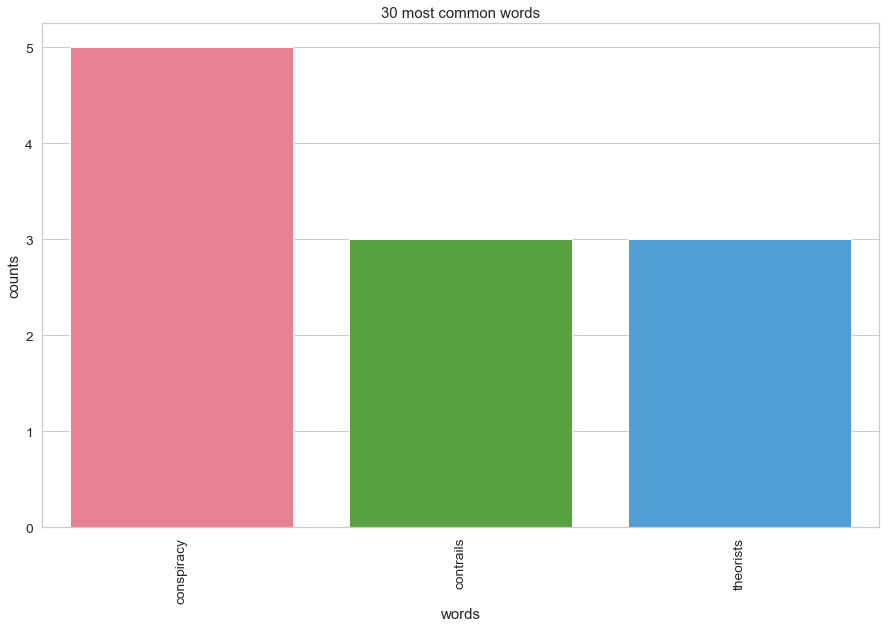

INFO:lda:n_documents: 13
INFO:lda:vocab_size: 3
INFO:lda:n_words: 11
INFO:lda:n_topics: 20
INFO:lda:n_iter: 2000
/anaconda3/lib/python3.7/site-packages/lda/utils.py:55: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if sparse and not np.issubdtype(doc_word.dtype, int):
INFO:lda:<0> log likelihood: -46
INFO:lda:<10> log likelihood: -43
INFO:lda:<20> log likelihood: -44
INFO:lda:<30> log likelihood: -44
INFO:lda:<40> log likelihood: -43
INFO:lda:<50> log likelihood: -44
INFO:lda:<60> log likelihood: -44
INFO:lda:<70> log likelihood: -43
INFO:lda:<80> log likelihood: -43
INFO:lda:<90> log likelihood: -43
INFO:lda:<100> log likelihood: -44
INFO:lda:<110> log likelihood: -44
INFO:lda:<120> log likelihood: -45
INFO:lda:<130> log likelihood: -43
INFO:lda:<140> log likelihood: -43
INFO:lda:<150> log likelihood: -45
INFO:lda:<160> log likelihood: -44
INFO:lda:<170

Topics found via LDA:

Topic #0:
theorists contrails conspiracy

Topic #1:
conspiracy theorists contrails

Topic #2:
conspiracy theorists contrails

Topic #3:
theorists contrails conspiracy

Topic #4:
theorists contrails conspiracy

Topic #5:
theorists contrails conspiracy

Topic #6:
conspiracy theorists contrails

Topic #7:
theorists contrails conspiracy

Topic #8:
contrails theorists conspiracy

Topic #9:
theorists contrails conspiracy

Topic #10:
theorists contrails conspiracy

Topic #11:
conspiracy theorists contrails

Topic #12:
theorists contrails conspiracy

Topic #13:
contrails theorists conspiracy

Topic #14:
theorists contrails conspiracy

Topic #15:
theorists contrails conspiracy

Topic #16:
conspiracy theorists contrails

Topic #17:
theorists contrails conspiracy

Topic #18:
theorists contrails conspiracy

Topic #19:
theorists contrails conspiracy


In [13]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
p.set_options(p.OPT.URL, p.OPT.EMOJI)
full_text_list_processed=[]
for x in range(len(flat_list)):
    full_text=flat_list[x]
    clean = re.compile('<.*?>')
    full_text_processed=re.sub(clean, '', full_text)
    full_text_processed=p.clean(full_text)
    full_text_processed=re.sub('[,\.!?]', '', full_text_processed)
    full_text_processed = re.sub(r'[^a-zA-Z0-9\s]', ' ', full_text_processed) 
    full_text_processed=full_text_processed.lower()
    full_text_processed = re.sub("#", "", full_text_processed)
    full_text_list_processed.append(full_text_processed)
# Convert the titles to lowercase
#full_text_list_processed = full_text_list_processed.apply(lambda x: x.lower())# Print out the first rows of papers
print(full_text_list_processed)
punc_word=set(punctuation)
stop_word=set(stopwords.words("English"))
self_defined_stop_words={"chemtrail","chemtrails ","chemtrails","Chemtrail","Chemtrails","GeoEngineering","geoengineering","IDoNotConsent","WeDoNotConsent","stopsprayingus","amp","geoengineering","idonotconsent","us","people","like"}
new_stop_word=stop_word.union(punc_word,self_defined_stop_words)
sns.set_style('whitegrid')
#%matplotlib inline
# Helper function

def plot_30_most_common_ngrams(count_data, count_vectorizer):
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[:30]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='30 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()# Initialise the count vectorizer with the English stop words
    
    
count_vectorizer = CountVectorizer(max_df=0.99,min_df=3,ngram_range=(1,1),stop_words=new_stop_word)# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(full_text_list_processed)# Visualise the 30 most common words
plot_30_most_common_ngrams(count_data, count_vectorizer)

"""
count_vectorizer = CountVectorizer(max_df=0.99,min_df=3,ngram_range=(2,2),stop_words=new_stop_word)# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(full_text_list_processed)# Visualise the 30 most common words
plot_30_most_common_ngrams(count_data, count_vectorizer)



#print most common trigrams
count_vectorizer = CountVectorizer(max_df=0.99,min_df=3,ngram_range=(3,3),stop_words=new_stop_word)# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(full_text_list_processed)# Visualise the 30 most common words
plot_30_most_common_ngrams(count_data, count_vectorizer)
"""

import warnings
warnings.simplefilter("ignore", DeprecationWarning)# Load the LDA model from sk-learn
#from sklearn.decomposition import LatentDirichletAllocation as LDA


import lda
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 20
number_words = 10# Create and fit the LDA model
lda = lda.LDA(n_topics=number_topics)
lda.fit(count_data)# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)


In [14]:
filename="in_between_account_index_list_for_sample"
infile = open(filename,'rb')
in_between_account_index_list = pickle.load(infile)
infile.close()
#print(tweeting_df)

in_between_account_index_list_sample=in_between_account_index_list[:8]
print(in_between_account_index_list_sample)

[13, 14, 25, 41, 45, 63, 82, 87]


In [16]:
full_text_list_for_in_between_account_sample=[]
for index in in_between_account_index_list_sample:
    user=tweeter_sample_by_num_of_status[index]
    print(user)
    full_text_1=read_and_process("ae832c68a41b48b890a426e159076a9b_001.json",user)
    full_text_2=read_and_process("ae832c68a41b48b890a426e159076a9b_002.json",user)
    full_text_3=read_and_process("ae832c68a41b48b890a426e159076a9b_003.json",user)
    full_text_4=read_and_process("ae832c68a41b48b890a426e159076a9b_004.json",user)
    full_text_list_for_in_between_account_sample.append(full_text_1+full_text_2+full_text_3+full_text_4)
    
print(full_text_list_for_in_between_account_sample)

yuuji_K1
clarita_mate
environmentguru
jurylady5
alllibertynews
CerroSantaAna
SpecialBureau
ejlazar
[["'Chemtrail' conspiracy theorists: The people who think governments control the weather https://t.co/ic2MYy6UoE", "'Chemtrail' conspiracy theorists: The people who think governments control the weather https://t.co/ic2MYy6UoE"], ['@AlDubYooh @wengcookie @pinkyfaye @DJGraphicsArts @GlianeMarienell @AverillaNena @Macdongov @latuazon @ADNYinYang @francisG_power5 @firgine @ashleylaw371 @luimaxM16 @TropALDUBCAVITE @cayanan_rona @russelle87 @YesIamYo @Gigi83069 @PatricioCora @armm2015 @chie_chie26 @abcbants @mariachonatabe1 @marichotabelina @ellina_gen @susanRa69 CHEMTRAIL\n#ALDUBxADNKasarinlan'], ['We are Not Amused. The Ridiculous Comment Every Meteorologist has Heard.: Meteorologist Keith Carson at WCSH in Maine likes to give grief in the form of facts to flat-earthers and chemtrail believers, but he just did a report that covers a comment that… https://t.co/mItz6yJwFw'], ['Pretty nice day

In [19]:
filename = 'full_text_list_for_in_between_accounts'
outfile = open(filename,'wb')
pickle.dump(full_text_list_for_in_between_account_sample,outfile)
outfile.close()

In [17]:
p.set_options(p.OPT.URL, p.OPT.EMOJI)
flat_list = [item for sublist in full_text_list_for_in_between_account_sample for item in sublist]
print(flat_list)

["'Chemtrail' conspiracy theorists: The people who think governments control the weather https://t.co/ic2MYy6UoE", "'Chemtrail' conspiracy theorists: The people who think governments control the weather https://t.co/ic2MYy6UoE", '@AlDubYooh @wengcookie @pinkyfaye @DJGraphicsArts @GlianeMarienell @AverillaNena @Macdongov @latuazon @ADNYinYang @francisG_power5 @firgine @ashleylaw371 @luimaxM16 @TropALDUBCAVITE @cayanan_rona @russelle87 @YesIamYo @Gigi83069 @PatricioCora @armm2015 @chie_chie26 @abcbants @mariachonatabe1 @marichotabelina @ellina_gen @susanRa69 CHEMTRAIL\n#ALDUBxADNKasarinlan', 'We are Not Amused. The Ridiculous Comment Every Meteorologist has Heard.: Meteorologist Keith Carson at WCSH in Maine likes to give grief in the form of facts to flat-earthers and chemtrail believers, but he just did a report that covers a comment that… https://t.co/mItz6yJwFw', 'Pretty nice day for the most part but #GeoEngineering spray all day. Trying to be sneaky at first then lots this evening.

[' chemtrail  conspiracy theorists  the people who think governments control the weather', ' chemtrail  conspiracy theorists  the people who think governments control the weather', ' aldubyooh  wengcookie  pinkyfaye  djgraphicsarts  glianemarienell  averillanena  macdongov  latuazon  adnyinyang  francisg power5  firgine  ashleylaw371  luimaxm16  tropaldubcavite  cayanan rona  russelle87  yesiamyo  gigi83069  patriciocora  armm2015  chie chie26  abcbants  mariachonatabe1  marichotabelina  ellina gen  susanra69 chemtrail  aldubxadnkasarinlan', 'we are not amused the ridiculous comment every meteorologist has heard  meteorologist keith carson at wcsh in maine likes to give grief in the form of facts to flat earthers and chemtrail believers but he just did a report that covers a comment that ', 'pretty nice day for the most part but  geoengineering spray all day trying to be sneaky at first then lots this evening idaho usa never a day off', 'amid ipcc climate alarmism report scientists are

/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:301: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['wedonotconsent'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


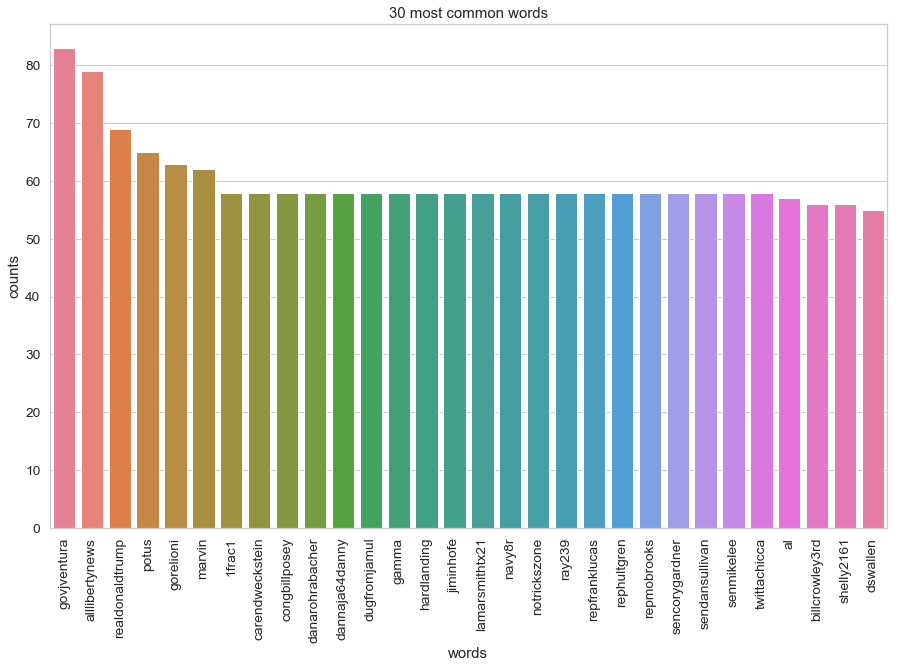

INFO:lda:n_documents: 176
INFO:lda:vocab_size: 357
INFO:lda:n_words: 4181
INFO:lda:n_topics: 20
INFO:lda:n_iter: 2000
/anaconda3/lib/python3.7/site-packages/lda/utils.py:55: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if sparse and not np.issubdtype(doc_word.dtype, int):
INFO:lda:<0> log likelihood: -43947
INFO:lda:<10> log likelihood: -25331
INFO:lda:<20> log likelihood: -23674
INFO:lda:<30> log likelihood: -22799
INFO:lda:<40> log likelihood: -22641
INFO:lda:<50> log likelihood: -22366
INFO:lda:<60> log likelihood: -22324
INFO:lda:<70> log likelihood: -22185
INFO:lda:<80> log likelihood: -22091
INFO:lda:<90> log likelihood: -21850
INFO:lda:<100> log likelihood: -21804
INFO:lda:<110> log likelihood: -21948
INFO:lda:<120> log likelihood: -21969
INFO:lda:<130> log likelihood: -21793
INFO:lda:<140> log likelihood: -21901
INFO:lda:<150> log likelihood: -2

Topics found via LDA:

Topic #0:
spraying around vomit911 skies admits mass wedonotconsent srm wanderinganimal world

Topic #1:
watch magapirate prisonplanettv alllibertynews trishadishes 1970 chevelless happening speak quite

Topic #2:
realdonaldtrump stop govjventura potus way earth talking mr ronpaul genocide

Topic #3:
watch trump prisonplanettv chem qanon trishadishes 8chan thechemstorm flight maga

Topic #4:
wrong bill hitlerians usa say duke reason pepe pls hate

Topic #5:
govjventura santos brigida rt icp resistance naomirwolf climatechange party wwg1wga

Topic #6:
gorelioni marvin potus carendweckstein sencorygardner notrickszone hardlanding rephultgren congbillposey gamma

Topic #7:
global new watch news world come rate renminbi old coldwar

Topic #8:
senrobportman drunktimes420 golejdorian ric caruso joy sensherrodbrown villa 910aw officialspgb

Topic #9:
please let help ask malicious start maga paranoia climate jack

Topic #10:
nycmayor repadamschiff repgutierrez repjohnlew

In [18]:
full_text_list_processed=[]
for x in range(len(flat_list)):
    full_text=flat_list[x]
    clean = re.compile('<.*?>')
    full_text_processed=re.sub(clean, '', full_text)
    full_text_processed=p.clean(full_text)
    full_text_processed=re.sub('[,\.!?]', '', full_text_processed)
    full_text_processed = re.sub(r'[^a-zA-Z0-9\s]', ' ', full_text_processed) 
    full_text_processed=full_text_processed.lower()
    full_text_processed = re.sub("#", "", full_text_processed)
    full_text_list_processed.append(full_text_processed)
# Convert the titles to lowercase
#full_text_list_processed = full_text_list_processed.apply(lambda x: x.lower())# Print out the first rows of papers
print(full_text_list_processed)
punc_word=set(punctuation)
stop_word=set(stopwords.words("English"))
self_defined_stop_words={"chemtrail","chemtrails ","chemtrails","Chemtrail","Chemtrails","GeoEngineering","geoengineering","IDoNotConsent","WeDoNotConsent","stopsprayingus","amp","geoengineering","idonotconsent","us","people","like"}
new_stop_word=stop_word.union(punc_word,self_defined_stop_words)
sns.set_style('whitegrid')
#%matplotlib inline
# Helper function

def plot_30_most_common_ngrams(count_data, count_vectorizer):
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[:30]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='30 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()# Initialise the count vectorizer with the English stop words
    
    
count_vectorizer = CountVectorizer(max_df=0.99,min_df=3,ngram_range=(1,1),stop_words=new_stop_word)# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(full_text_list_processed)# Visualise the 30 most common words
plot_30_most_common_ngrams(count_data, count_vectorizer)

"""
count_vectorizer = CountVectorizer(max_df=0.99,min_df=3,ngram_range=(2,2),stop_words=new_stop_word)# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(full_text_list_processed)# Visualise the 30 most common words
plot_30_most_common_ngrams(count_data, count_vectorizer)



#print most common trigrams
count_vectorizer = CountVectorizer(max_df=0.99,min_df=3,ngram_range=(3,3),stop_words=new_stop_word)# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(full_text_list_processed)# Visualise the 30 most common words
plot_30_most_common_ngrams(count_data, count_vectorizer)
"""

import warnings
warnings.simplefilter("ignore", DeprecationWarning)# Load the LDA model from sk-learn
#from sklearn.decomposition import LatentDirichletAllocation as LDA


import lda
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 20
number_words = 10# Create and fit the LDA model
lda = lda.LDA(n_topics=number_topics)
lda.fit(count_data)# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)